# Specifying factors for GMST/GSAT conversion and amount of total Earth energy in the ocean

Requires fair >= 1.6.0c3 and < 2.0.0

In [1]:
# NBVAL_IGNORE_OUTPUT
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/home/jared/code/uom/openscm-runner/src/openscm_runner/run.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.4.4+48.gc9ac41f


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from scmdata import ScmRun
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
# NBVAL_IGNORE_OUTPUT
fair.get_version()

'1.6.3'

In [6]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True,
)

In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {},  # passing an empty list of an empty dict will run with defaults
            {"ohu_factor": 0.95, "gmst_factor": np.linspace(0.90, 1.00, 351)},
        ],
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Air Ocean Blended Temperature Change",
        "Heat Content|Ocean",
        "Heat Uptake|Ocean",
    ),
)

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [8]:
# NBVAL_IGNORE_OUTPUT
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.3'

In the below we plot two runs per scenario. The first is with default OHU and GMST factors (0.92 and 1/1.04) and the second is with the specified factors (0.95 for OHU and a time-varying one for GMST). 

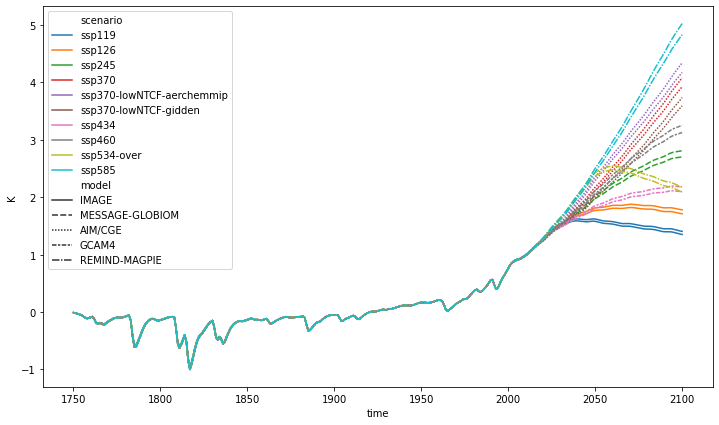

In [9]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Air Ocean Blended Temperature Change").lineplot(
    hue="scenario",
    style="model",
    ax=ax,
    time_axis="year",
    units="run_id",
    estimator=None,
)

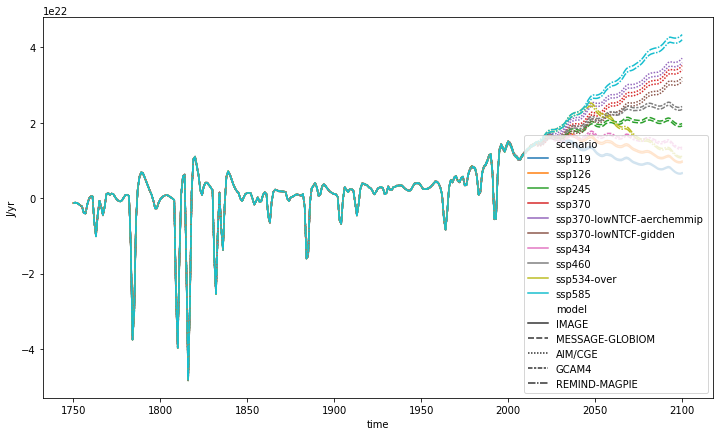

In [10]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Heat Uptake|Ocean").lineplot(
    hue="scenario",
    style="model",
    ax=ax,
    time_axis="year",
    units="run_id",
    estimator=None,
)

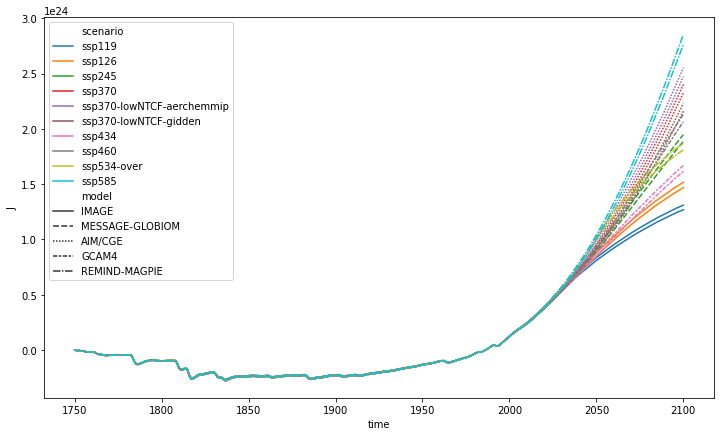

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Heat Content|Ocean").lineplot(
    hue="scenario",
    style="model",
    ax=ax,
    time_axis="year",
    units="run_id",
    estimator=None,
)